In [1]:
import pandas as pd
from tfib.tfibengines import TFIBEngine
from datetime import timedelta

In [2]:
# SETTINGS (TODO)
# dataset path
# train split rateo
# validation split rateo
DATASET_PATH = "data/COVID19_2023_02_22_DATASET.csv"
TRAIN_SPLIT = 0.3
VALID_SPLIT = 0.2
CREDIBILITY_THR = 45.0

## Data load and split

In [3]:
dtype = {'tweet_id': str,
         'user_id': str,
         'retweeted_user_id': str,
         'retweeted_status_id': str,
         "retweeeted_user_id": str}

covid_df = pd.read_csv(DATASET_PATH, parse_dates=[1], dtype=dtype)

In [4]:
covid_df

,tweet_id,created_at,user_id,retweeted_status_id,retweeted_user_id,credibility_score
0,1340468299025551360,2020-12-20 01:25:21+00:00,497188910,1340325850378592257,1017807360075665408,64.5
1,1340468728534884354,2020-12-20 01:27:04+00:00,924336025387913221,ORIGIN,AUTHOR,95.0
2,1340473042129080320,2020-12-20 01:44:12+00:00,47148805,ORIGIN,AUTHOR,100.0
3,1340474125656190978,2020-12-20 01:48:31+00:00,1022891525242593280,ORIGIN,AUTHOR,5.0
4,1340477947627581440,2020-12-20 02:03:42+00:00,908206586,ORIGIN,AUTHOR,95.0
...,...,...,...,...,...,...
819947,1451536212381011970,2021-10-22 13:09:35+00:00,1329549977463508993,1450461737895989261,4758512368,39.5
819948,1451536215858155528,2021-10-22 13:09:36+00:00,1446561632105205774,1451536139131801605,1446561632105205774,82.5
819949,1451536226876526601,2021-10-22 13:09:39+00:00,712365073,1451310094461947909,1173682089637625856,12.5
819950,1451536327388942348,2021-10-22 13:10:03+00:00,1036611673,1451536158098399236,1260895357548068865,20.0


In [5]:
data_df = covid_df[covid_df.retweeted_user_id != "AUTHOR"].sort_values(by="created_at").reset_index(drop=True)
data_df

,tweet_id,created_at,user_id,retweeted_status_id,retweeted_user_id,credibility_score
0,1340468299025551360,2020-12-20 01:25:21+00:00,497188910,1340325850378592257,1017807360075665408,64.5
1,1340480189462134784,2020-12-20 02:12:36+00:00,2288557992,1340427316573462530,1063806444380798976,95.0
2,1340481082270085120,2020-12-20 02:16:09+00:00,1237071348662448129,1340427316573462530,1063806444380798976,95.0
3,1340481539709276163,2020-12-20 02:17:58+00:00,475234937,1340481328056332289,122733775,90.0
4,1340489259183206406,2020-12-20 02:48:39+00:00,100878763,1340427316573462530,1063806444380798976,95.0
...,...,...,...,...,...,...
371581,1451535612004216833,2021-10-22 13:07:12+00:00,1430162268,1451523072146743324,605614784,80.0
371582,1451536212381011970,2021-10-22 13:09:35+00:00,1329549977463508993,1450461737895989261,4758512368,39.5
371583,1451536215858155528,2021-10-22 13:09:36+00:00,1446561632105205774,1451536139131801605,1446561632105205774,82.5
371584,1451536226876526601,2021-10-22 13:09:39+00:00,712365073,1451310094461947909,1173682089637625856,12.5


In [6]:
# Splits
cut_index = int(len(data_df)*TRAIN_SPLIT)
train_set_df = data_df.iloc[:cut_index]
test_set_df = data_df.iloc[cut_index:]

In [7]:
train_set_df

,tweet_id,created_at,user_id,retweeted_status_id,retweeted_user_id,credibility_score
0,1340468299025551360,2020-12-20 01:25:21+00:00,497188910,1340325850378592257,1017807360075665408,64.5
1,1340480189462134784,2020-12-20 02:12:36+00:00,2288557992,1340427316573462530,1063806444380798976,95.0
2,1340481082270085120,2020-12-20 02:16:09+00:00,1237071348662448129,1340427316573462530,1063806444380798976,95.0
3,1340481539709276163,2020-12-20 02:17:58+00:00,475234937,1340481328056332289,122733775,90.0
4,1340489259183206406,2020-12-20 02:48:39+00:00,100878763,1340427316573462530,1063806444380798976,95.0
...,...,...,...,...,...,...
297263,1432778805035290626,2021-08-31 18:54:21+00:00,1418645210645549056,1432687159715246081,283416650,82.5
297264,1432778912120049667,2021-08-31 18:54:47+00:00,1416832693136990210,1432773436250759169,454909771,17.5
297265,1432778969896660993,2021-08-31 18:55:00+00:00,385897719,1432617915908509697,25676606,75.0
297266,1432779018085019649,2021-08-31 18:55:12+00:00,225168723,856536268251025411,289400495,77.5


In [8]:
test_set_df

,tweet_id,created_at,user_id,retweeted_status_id,retweeted_user_id,credibility_score
297268,1432779497368170499,2021-08-31 18:57:06+00:00,1039518696476045312,1432777108896555008,1144560202529812480,87.5
297269,1432779808866439168,2021-08-31 18:58:20+00:00,1385709282,1432732377311232004,1032615842,0.0
297270,1432779983995428865,2021-08-31 18:59:02+00:00,2397689598,1432739257731403776,4758512368,39.5
297271,1432780137481838595,2021-08-31 18:59:39+00:00,139765259,1432332225077514244,4758512368,39.5
297272,1432780414817611780,2021-08-31 19:00:45+00:00,355402185,1432685864346439688,25676606,75.0
...,...,...,...,...,...,...
371581,1451535612004216833,2021-10-22 13:07:12+00:00,1430162268,1451523072146743324,605614784,80.0
371582,1451536212381011970,2021-10-22 13:09:35+00:00,1329549977463508993,1450461737895989261,4758512368,39.5
371583,1451536215858155528,2021-10-22 13:09:36+00:00,1446561632105205774,1451536139131801605,1446561632105205774,82.5
371584,1451536226876526601,2021-10-22 13:09:39+00:00,712365073,1451310094461947909,1173682089637625856,12.5


In [9]:
# TODO: Save test_set for later evaluation phase in other notebook...

## Hyper-parameters tuning

Tune on a validation set

In [10]:
cut_index = int(len(train_set_df)*(1-VALID_SPLIT))
tuning_set_df = train_set_df.iloc[:cut_index]
valid_set_df = train_set_df.iloc[cut_index:]

In [11]:
tuning_set_df

,tweet_id,created_at,user_id,retweeted_status_id,retweeted_user_id,credibility_score
0,1340468299025551360,2020-12-20 01:25:21+00:00,497188910,1340325850378592257,1017807360075665408,64.5
1,1340480189462134784,2020-12-20 02:12:36+00:00,2288557992,1340427316573462530,1063806444380798976,95.0
2,1340481082270085120,2020-12-20 02:16:09+00:00,1237071348662448129,1340427316573462530,1063806444380798976,95.0
3,1340481539709276163,2020-12-20 02:17:58+00:00,475234937,1340481328056332289,122733775,90.0
4,1340489259183206406,2020-12-20 02:48:39+00:00,100878763,1340427316573462530,1063806444380798976,95.0
...,...,...,...,...,...,...
237809,1417745910134624256,2021-07-21 07:19:00+00:00,759428777793429505,1417735563629801475,1683455144,5.0
237810,1417745974055866369,2021-07-21 07:19:15+00:00,1027756003134263296,1417518076795437057,1032615842,25.0
237811,1417746154217934850,2021-07-21 07:19:58+00:00,707207821,1417602406326616071,1165229956122763265,17.5
237812,1417746610759651329,2021-07-21 07:21:47+00:00,405179576,1417740978413318144,1072167411984551936,100.0


In [12]:
valid_set_df

,tweet_id,created_at,user_id,retweeted_status_id,retweeted_user_id,credibility_score
237814,1417746832109838337,2021-07-21 07:22:39+00:00,3163728767,1417574650650009603,25676606,75.0
237815,1417747134636609538,2021-07-21 07:23:52+00:00,1167004816603828224,1417740978413318144,1072167411984551936,100.0
237816,1417747156916744192,2021-07-21 07:23:57+00:00,1367792634199162885,1417744249613869058,1032615842,95.0
237817,1417747542037733377,2021-07-21 07:25:29+00:00,1103360481341902854,1400423583575379970,331617619,82.5
237818,1417747652045852674,2021-07-21 07:25:55+00:00,869873746559062017,1417747360080334848,257130763,87.5
...,...,...,...,...,...,...
297263,1432778805035290626,2021-08-31 18:54:21+00:00,1418645210645549056,1432687159715246081,283416650,82.5
297264,1432778912120049667,2021-08-31 18:54:47+00:00,1416832693136990210,1432773436250759169,454909771,17.5
297265,1432778969896660993,2021-08-31 18:55:00+00:00,385897719,1432617915908509697,25676606,75.0
297266,1432779018085019649,2021-08-31 18:55:12+00:00,225168723,856536268251025411,289400495,77.5


In [13]:
# Prepare data for hyper-parameter tuning
tuning_set = list(tuning_set_df.itertuples(index=False))
# valid_set = list(valid_set.itertuples(index=False))

In [14]:
# Validation ground truth loading
from tfib.evaluations import get_retweet_network, get_optimal_ranking

validation_retweets_network = get_retweet_network(
    valid_set_df[valid_set_df.credibility_score <= CREDIBILITY_THR],
    rt_UserID_col="retweeted_user_id",
    userID_col="user_id",
    rating_col="credibility_score")

validation_optimal_ranking = get_optimal_ranking(validation_retweets_network).set_index("node")
validation_optimal_ranking

,outgoing_weight,incoming_weight
node,,
1683455144,3970.0,10.0
4758512368,2600.0,0.0
1248216384577953792,1579.0,11.0
1032615842,1201.0,77.0
245969509,759.0,21.0
...,...,...
995833592671490050,0.0,1.0
99702635,0.0,1.0
998516845241159683,0.0,1.0


In [15]:
# Assign a combined single score to the ranking that keeps the order
validation_optimal_ranking['combined'] = (
    validation_optimal_ranking["outgoing_weight"] +
    validation_optimal_ranking["incoming_weight"] / 
    (validation_optimal_ranking["incoming_weight"].max() + 1))

validation_optimal_ranking

,outgoing_weight,incoming_weight,combined
node,,,
1683455144,3970.0,10.0,3970.075758
4758512368,2600.0,0.0,2600.000000
1248216384577953792,1579.0,11.0,1579.083333
1032615842,1201.0,77.0,1201.583333
245969509,759.0,21.0,759.159091
...,...,...,...
995833592671490050,0.0,1.0,0.007576
99702635,0.0,1.0,0.007576
998516845241159683,0.0,1.0,0.007576


In [16]:
# Create the ranking in the dict format
validation_optimal_ranking = validation_optimal_ranking.to_dict()["combined"]
list(validation_optimal_ranking.items())[:10]

{'1683455144': 3970.0757575757575,
 '4758512368': 2600.0,
 '1248216384577953792': 1579.0833333333333,
 '1032615842': 1201.5833333333333,
 '245969509': 759.1590909090909,
 '454365633': 557.0075757575758,
 '1935534786': 479.0,
 '337767301': 423.0,
 '598157014': 337.0,
 '1289758279250452480': 326.00757575757575,
 '221681749': 291.0833333333333,
 '1006071437168390144': 272.0,
 '500882938': 267.00757575757575,
 '1241675979929661442': 254.28030303030303,
 '473801195': 244.0,
 '849274159': 232.0,
 '2298886449': 219.0151515151515,
 '2512612640': 215.00757575757575,
 '283416650': 208.20454545454547,
 '33284443': 192.0530303030303,
 '1620487452': 192.0,
 '1299065964827418625': 191.0151515151515,
 '1343955493212065794': 186.04545454545453,
 '1256856435150843904': 185.0,
 '1425032107404021789': 165.0,
 '398117986': 157.0,
 '1673695388': 152.1060606060606,
 '1392726045082767360': 148.0,
 '1225034977': 146.03787878787878,
 '1421416655582900225': 142.0151515151515,
 '726721856749842436': 132.07575757

In [17]:
# GRID SEARCH #

from tqdm.auto import tqdm
from tfib.evaluations import ranking_loss_normalized

# Days (delta) to explore
max_days = (tuning_set_df.created_at.max() - tuning_set_df.created_at.min()).days
#intervals = 6
#interval_delta = max_days // intervals
deltas = [1, 5, 10, 15, 16, 17, 18, 19, 20, 25, max_days] #list(range(1, max_days, 5))

# Alpha values to explore
alphas = [1, 1/2, 1/4, 1/8]

# Phi values to explore
phis = [0.0] # [0.0, 0.5, 4.0]

# Mu values to explore
mus = [1.0] #[1.0, 0.5, 0.2]

# Store the results
evaluated = []
evaluated_partial = []

# Total configurations to test
total_tests = len(deltas) * len(alphas) * len(phis) * len(mus)
print(f"Testing {total_tests} configurations...")

# Create the global progress bar
progress_bar = tqdm(total=total_tests)

# Grid search loop
for d in deltas:    
    for a in alphas:
        for p in phis:
            for m in mus:
        
                # Create a new model instance with params
                engine = TFIBEngine(
                    reshare_key=lambda x: x[0],
                    author_key=lambda x: x[2],
                    original_post_key=lambda x: x[3],
                    original_author_key=lambda x: x[4],
                    timestamp_key=lambda x: x[1],
                    flag_key=lambda x: x[5],
                    delta=timedelta(days=d),
                    alpha=a,
                    phi=0.2,
                    mu=1,
                    credibility_threshold = CREDIBILITY_THR,
                    enable_repost_count_scaling = False)
        
                # Fit the model
                engine.time_fit(tuning_set)
        
                # Get the rank
                ranking = engine.get_rank()
                
                # Ranking evaluation
                loss = ranking_loss_normalized(validation_optimal_ranking, ranking)
        
                # Save params configuration
                evaluation = (d, a, p, m, loss)
                evaluated.append(evaluation)

                progress_bar.update()

        evaluated_partial.append((d, a, loss))
                
progress_bar.close()

Testing 44 configurations...


  0%|          | 0/44 [00:00<?, ?it/s]

In [18]:
evaluated_df = pd.DataFrame(evaluated, columns=["Delta", "Alpha", "Phi", "Mu", "Loss"]).sort_values(by="Loss")
evaluated_df.head(30)

,Delta,Alpha,Phi,Mu,Loss
29,19,0.500,0.0,1.0,0.010976
33,20,0.500,0.0,1.0,0.010996
38,25,0.250,0.0,1.0,0.011313
25,18,0.500,0.0,1.0,0.011397
37,25,0.500,0.0,1.0,0.011957
21,17,0.500,0.0,1.0,0.012839
39,25,0.125,0.0,1.0,0.013140
17,16,0.500,0.0,1.0,0.013490
34,20,0.250,0.0,1.0,0.015380
13,15,0.500,0.0,1.0,0.015765


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

def plot_heatmap(matrix, row_axis_name, col_axis_name, colorbar_name, x_ticks=None, y_ticks=None, palette='magma', reverse_palette=False):

    if reverse_palette:
        palette = sns.color_palette(palette, as_cmap=True).reversed()
    
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    heatmap = sns.heatmap(matrix, cmap=palette, annot=True, fmt=".4f", cbar_kws={'label': colorbar_name, 'shrink': 0.7},annot_kws={"size": 8})
    
    # Set labels for the axes
    plt.xlabel(col_axis_name)
    plt.ylabel(row_axis_name)
    
    # Set actual values for x and y ticks if provided
    if x_ticks is not None:
        plt.xticks(ticks=np.arange(len(x_ticks)) + 0.5, labels=x_ticks)
    if y_ticks is not None:
        plt.yticks(ticks=np.arange(len(y_ticks)) + 0.5, labels=y_ticks)
    
    # Set aspect ratio to make cells square
    plt.gca().set_aspect('equal', adjustable='box')

    # Find indices of minimum value
    min_row, min_col = np.unravel_index(np.argmin(matrix), matrix.shape)
    
    # Draw square around cell with lowest value
    cell_x = min_col
    cell_y = min_row
    cell_width = 1
    cell_height = 1
    rect = Rectangle((cell_x, cell_y), cell_width, cell_height, linewidth=2, edgecolor='red', facecolor='none')
    plt.gca().add_patch(rect)
    
    # Show the plot
    plt.show()


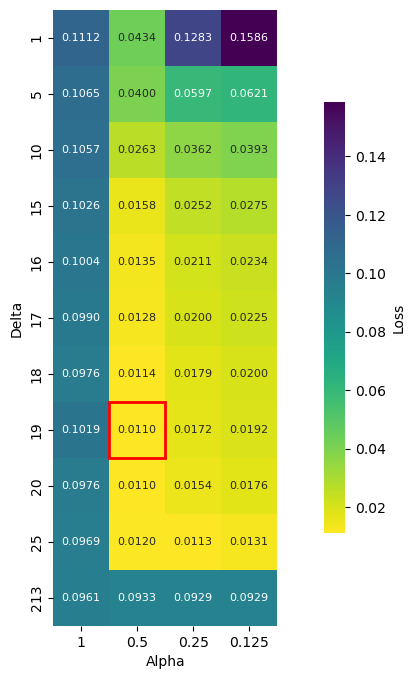

In [20]:
# Get the matrix (delta x alpha)
result_matrix = np.array([x[-1] for x in evaluated_partial]).reshape(len(deltas), len(alphas))

# Call the function
plot_heatmap(result_matrix, "Delta", "Alpha", "Loss", x_ticks=alphas, y_ticks=deltas, palette='viridis', reverse_palette=True)

In [21]:
# Top K vs Bottom K optimal solutions
K = 1
params_rank = sorted(evaluated, key=lambda x: x[-1])
top_k = params_rank[:K]
bottom_k = params_rank[-K:]
highlights = top_k + bottom_k
params_rank[:3]

[(19, 0.5, 0.0, 1.0, 0.010975644923958208),
 (20, 0.5, 0.0, 1.0, 0.010996326868746416),
 (25, 0.25, 0.0, 1.0, 0.011312654212944398)]

In [22]:
highlights  # Show best and worse configurations

[(19, 0.5, 0.0, 1.0, 0.010975644923958208),
 (1, 0.125, 0.0, 1.0, 0.15859259921335783)]

In [23]:
# Select best hyperparams
BEST_DELTA = params_rank[0][0]
BEST_ALPHA = params_rank[0][1]
BEST_PHI = params_rank[0][2]
BEST_MU = params_rank[0][3]

## Training

In [24]:
from tfib.tfibengines import TFIBEngine
from datetime import timedelta

fib_engine = TFIBEngine(
    reshare_key=lambda x: x[0],
    author_key=lambda x: x[2],
    original_post_key=lambda x: x[3],
    original_author_key=lambda x: x[4],
    timestamp_key=lambda x: x[1],
    flag_key=lambda x: x[5],
    delta=timedelta(days=BEST_DELTA),
    alpha=BEST_ALPHA,
    phi=BEST_PHI,
    mu=BEST_MU,
    credibility_threshold = CREDIBILITY_THR,
    enable_repost_count_scaling = False)

tfib_engine = TFIBEngine(
    reshare_key=lambda x: x[0],
    author_key=lambda x: x[2],
    original_post_key=lambda x: x[3],
    original_author_key=lambda x: x[4],
    timestamp_key=lambda x: x[1],
    flag_key=lambda x: x[5],
    delta=timedelta(days=BEST_DELTA),
    alpha=BEST_ALPHA,
    phi=BEST_PHI,
    mu=BEST_MU,
    credibility_threshold = CREDIBILITY_THR,
    enable_repost_count_scaling = False)

# Create the data for model training
train_set_tuplelist = list(train_set_df.itertuples(index=False))

# Train both models
fib_engine.fit(train_set_tuplelist) # Baseline
tfib_engine.time_fit(train_set_tuplelist) # Proposed

In [25]:
# Show Top 10 for FIB (Baseline)
list(fib_engine.get_rank().items())[:10]

[('1683455144', 77.0),
 ('245969509', 41.0),
 ('1248216384577953792', 35.0),
 ('1032615842', 32.0),
 ('4758512368', 27.0),
 ('1322629376421355521', 25.0),
 ('454365633', 24.0),
 ('910827588', 23.0),
 ('1063806444380798976', 21.0),
 ('1935534786', 18.0)]

In [26]:
# Show Top 10 for TFIB (Proposed)
list(tfib_engine.get_rank().items())[:10]

[('1683455144', 16.401855),
 ('4758512368', 11.223999),
 ('1248216384577953792', 10.900879),
 ('1032615842', 7.1712646),
 ('454365633', 6.418457),
 ('1935534786', 4.5792236),
 ('245969509', 4.3726807),
 ('500882938', 4.003296),
 ('1425032107404021789', 4.0),
 ('775343030421291008', 3.9660645)]

### Build the Test Ground Truth

In [27]:
# Build retweet networks from test set (low credibility retweets only)
test_retweets_network = get_retweet_network(
    test_set_df[test_set_df.credibility_score <= CREDIBILITY_THR],
    rt_UserID_col="retweeted_user_id",
    userID_col="user_id",
    rating_col="credibility_score")

# Raw optimal ranking
test_optimal_ranking = get_optimal_ranking(test_retweets_network).set_index("node")

# Conbine the scores to get a single score that keep the ordering
test_optimal_ranking['combined'] = (
    test_optimal_ranking["outgoing_weight"] +
    test_optimal_ranking["incoming_weight"] / 
    (test_optimal_ranking["incoming_weight"].max() + 1))

# Get the optimal ranking as a dict (ground truth)
test_optimal_ranking = test_optimal_ranking.to_dict()["combined"]

In [28]:
# Show Top 10 for opimal ranking
list(test_optimal_ranking.items())[:10]

[('4758512368', 8844.0),
 ('1683455144', 5380.10625),
 ('1248216384577953792', 3906.00625),
 ('1241675979929661442', 1158.45625),
 ('1173682089637625856', 881.0),
 ('775343030421291008', 685.0),
 ('1006071437168390144', 612.0),
 ('1032615842', 594.4375),
 ('1935534786', 555.0),
 ('874606845511565313', 503.01875)]

In [29]:
# Evaluate the loss with the test set
TFIB_loss = ranking_loss_normalized(test_optimal_ranking, tfib_engine.get_rank())
print(f"TFIB Loss: {TFIB_loss}")

TFIB Loss: 0.012316059521948596


## Hyper parameters comparison

In [30]:
# Hyperparams to show
hparams_pairs = [(d, a, p, m) for d, a, p, m, _ in highlights]
hparams_pairs

[(19, 0.5, 0.0, 1.0), (1, 0.125, 0.0, 1.0)]

In [31]:
# Add the baseline with fake values
rank_list = [(fib_engine.get_rank(), -1, -1)]

# Testing loop
for delta, alpha, phi, mu in tqdm(hparams_pairs):
    
    # Create a new model instance with params
    model = TFIBEngine(
        reshare_key=lambda x: x[0],
        author_key=lambda x: x[2],
        original_post_key=lambda x: x[3],
        original_author_key=lambda x: x[4],
        timestamp_key=lambda x: x[1],
        flag_key=lambda x: x[5],
        delta=timedelta(days=delta),
        alpha=alpha,
        phi=phi,
        mu=mu,
        credibility_threshold = CREDIBILITY_THR,
        enable_repost_count_scaling = False)

    # Fit the model
    model.time_fit(train_set_tuplelist)

    # Get the rank and save the running configuration
    rank_list.append((model.get_rank(), alpha, delta))

  0%|          | 0/2 [00:00<?, ?it/s]

In [32]:
from tfib.evaluations import network_dismantle

dismantling_tests = []

# Dismantling loop
for r, a, i in tqdm(rank_list):
    
    seq = network_dismantle(test_retweets_network, pd.DataFrame.from_dict(r, orient='index'))
    
    dismantling_tests.append((seq, a, i))

  0%|          | 0/3 [00:00<?, ?it/s]

In [33]:
# pd.DataFrame.from_dict(test_optimal_ranking, orient='index')

In [34]:
def make_lists_same_length(data):
    
    max_length = max(len(lst) for lst in data.values())
    
    for key, lst in data.items():
        last_element = lst[-1]
        while len(lst) < max_length:
            lst.append(last_element)

data = {
    "list1": [1, 2, 3],
    "list2": [4, 5],
    "list3": [6, 7, 8, 9]
}

make_lists_same_length(data)
print(data)


{'list1': [1, 2, 3, 3], 'list2': [4, 5, 5, 5], 'list3': [6, 7, 8, 9]}


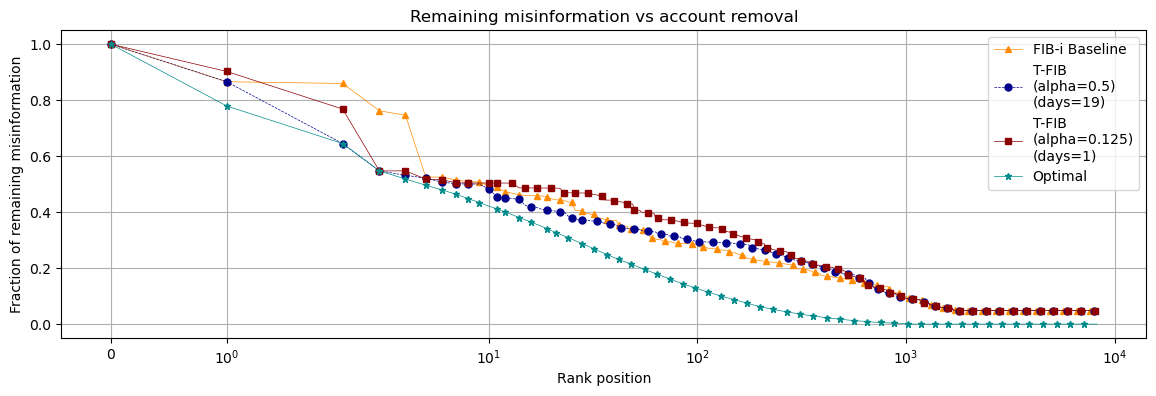

In [35]:
# Build a DataFrame with results
to_df_dict = {"FIB-i Baseline" : [y for _, y in dismantling_tests[0][0]]}

for seq, a, i in dismantling_tests[1:]:
    to_df_dict[f'T-FIB\n(alpha={a})\n(days={i})'] = [y for _, y in seq]
    
# Add the optimal rank dismantle sequence    
to_df_dict['Optimal'] = [y for _, y in network_dismantle(test_retweets_network,
                                                         pd.DataFrame.from_dict(test_optimal_ranking, orient='index'))]

make_lists_same_length(to_df_dict)

# Convert to dataframe
dismantle_df = pd.DataFrame(to_df_dict)

# Set up the plot
colors = ['darkorange','darkblue', 'darkred', 'darkcyan']#'darkgreen', 'darkmagenta', 'darkcyan']
styles = ['^-', 'o--', 's-' , '*-']# , '+-']
ax = dismantle_df.plot.line(logx='sym',
                            figsize=(14, 4),
                            grid=True,
                            color=colors,
                            style=styles,
                            linewidth=0.5,
                            markevery=0.012,
                            ms=5,
                            title='Remaining misinformation vs account removal')

ax.set_ylabel("Fraction of remaining misinformation")

ax.set_xlabel("Rank position");

## Save ranking